## 1.. Lets read data !

In [179]:
## import necessary packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
train_data = pd.read_excel(r"/data/rrjha/abhishek/Airline_project/Data_Train.xlsx")

In [181]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [182]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## 2.. Lets deal with missing values ..

In [183]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [184]:
## After loading it is important to check null/missing values in a column or a row
## Missing value :  values which occur when no data is recorded for an observation..

train_data.isnull().sum()

## train_data.isnull().sum(axis=0)
## by-default axis is 0 , ie it computes total missing values column-wise !

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [185]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [186]:
### getting all the rows where we have missing value

train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### as we have 1 missing value , I can directly drop these

In [187]:
train_data.dropna(inplace=True)

In [188]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [189]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [190]:
### In order to more accurate memory usage , u can leverage memory_usage="deep" in info()
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


## 3.. Lets Perform Data Pre-process & extract Derived attributes from "Date_of_Journey"
        lets extract derived attributes from "Date_of_Journey" & fetch day , month , year !

In [191]:
data = train_data.copy()

In [192]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [193]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [194]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [195]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [196]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [197]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [198]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

In [199]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [200]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [201]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [202]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [203]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-02-16 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-02-16 05:50:00,2026-02-16 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-02-16 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


## 4.. Lets try to clean Dep_Time & Arrival_Time & then extract Derived attributes ..

In [204]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [205]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [206]:
# Departure time is when a plane leaves the gate. 

extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-02-16 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-02-16 05:50:00,2026-02-16 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-02-16 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [207]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-02-16 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-02-16 05:50:00,2026-02-16 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-02-16 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [208]:
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [209]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [210]:
data.shape

(10682, 16)

## 5.. lets analyse when will most of the flights take-off..

In [211]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [212]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    
    '''
    
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif (x>20) and (x<=24):
        return "Night"
    
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

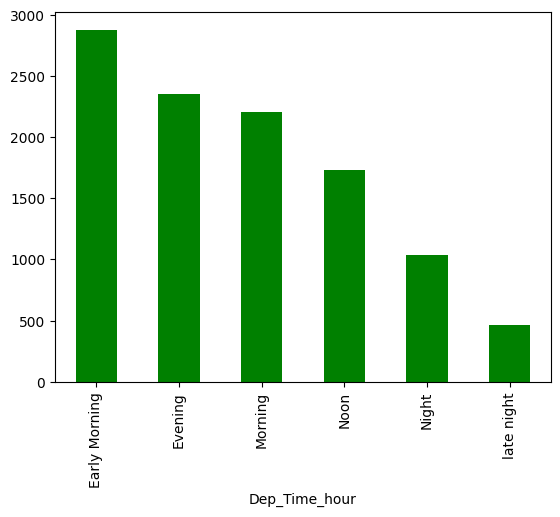

In [213]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

In [214]:
#### how to make above graph interactive , lets use Cufflinks & plotly to make it interactive !

In [215]:
## how to use Plotly interactive plots directly with Pandas dataframes, First u need below set-up !

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.


In [216]:
import plotly.express as px

vc = data['Dep_Time_hour'].apply(flight_dep_time).value_counts().reset_index()
vc.columns = ['Dep_Time_hour', 'count']

px.bar(vc, x='Dep_Time_hour', y='count')


In [217]:
# data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")

## 6.. Pre-process Duration Feature & extract meaningful features from it..

In [218]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [219]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [220]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [221]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [222]:
data['Duration'][0]

'2h 50m'

In [223]:
'2h 50m'.split(' ')

['2h', '50m']

In [224]:
'2h 50m'.split(' ')[0]

'2h'

In [225]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [226]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [227]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [228]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [229]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [230]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [231]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [232]:
pd.to_timedelta(data["Duration"]).dt.components.hours

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: hours, Length: 10682, dtype: int64

In [233]:
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours

In [234]:
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

## 7.. Lets Analyse whether Duration impacts Price or not ?

In [235]:
data['Duration'] ## convert duration into total minutes duration ..

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [236]:
2*60

120

In [237]:
'2*60'

'2*60'

In [238]:
eval('2*60')

120

In [239]:
# compute total duration in minutes using already-extracted duration components
data['Duration_total_mins'] = data['Duration_hour'] * 60 + data['Duration_minute']

In [240]:
#data["Duration_in_minute"] = data["Duration_hour"]*60 + data["Duration_minute"]

In [241]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [242]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

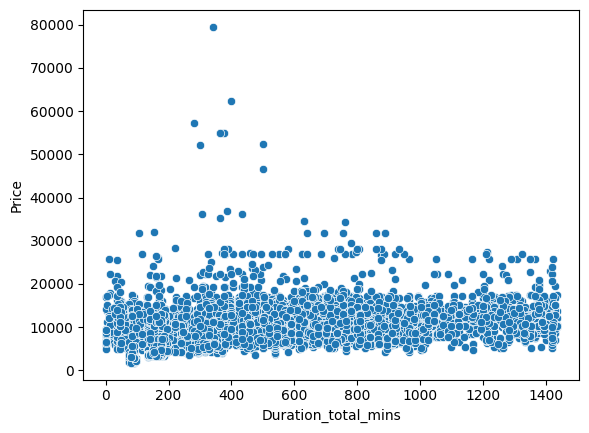

In [243]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

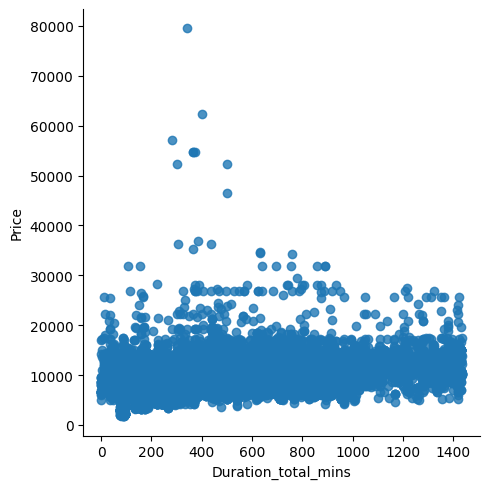

In [244]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

### pretty clear that As the duration of minutes increases Flight price also increases.

In [245]:
### lets understand whether total stops affect price or not !

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

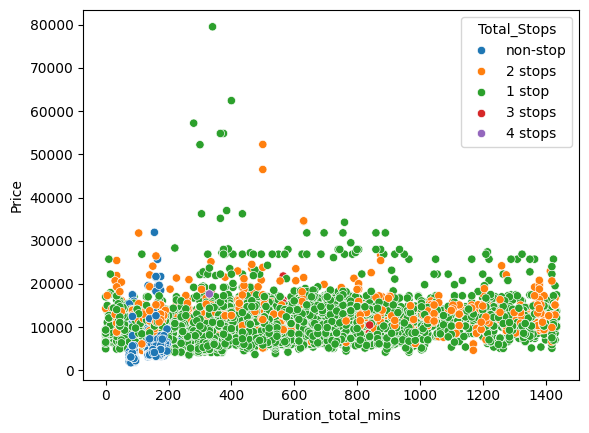

In [246]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

In [247]:
'''
Non stops flights take less duration while their fare is also low, then as the stop increases, 
duration also increases and price also increases(in most of the cases)

'''

'\nNon stops flights take less duration while their fare is also low, then as the stop increases, \nduration also increases and price also increases(in most of the cases)\n\n'

## 8.. on which route Jet Airways is extremely used?

In [248]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [249]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

### b.. Performing Airline vs Price Analysis.. 
        ie find price distribution & 5-point summary of each Airline..

In [250]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

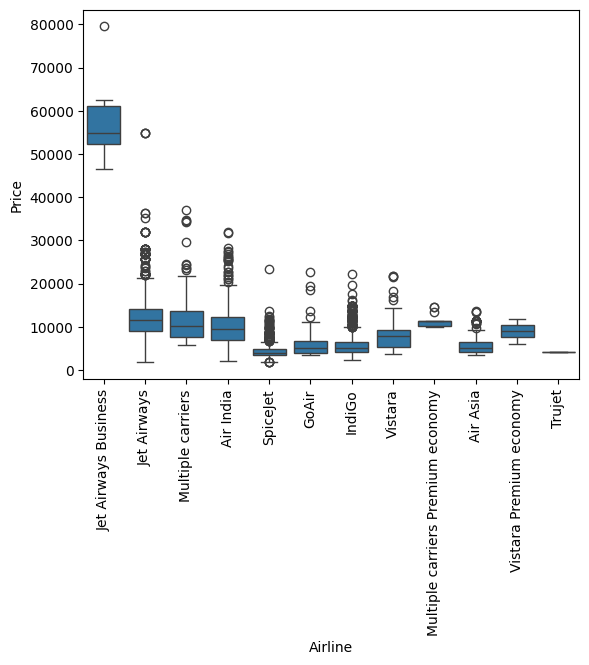

In [251]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [252]:
'''

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., 
              Apart from the first Airline almost all are having similar median

'''

'\n\nConclusion--> From graph we can see that Jet Airways Business have the highest Price., \n              Apart from the first Airline almost all are having similar median\n\n'

## 9.. Applying one-hot Encoding on data..

In [253]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2019,22,20,1,10,2,50,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,2019,5,50,13,15,7,25,7,25,445


In [254]:
'''

Categorical data refers to a data type that can be stored into groups/categories/labels 
Examples of categorical variables are  age group, educational level,blood type etc.. 


Numerical data refers to the data that is in the form of numbers, 
Examples of numerical data are height, weight, age etc.. 

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. 
                In case of infinity, these numbers will keep going on...
                age of a fly : 8 , 9 day etc..
                
Continuous data : which is continuous in nature 
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !
                  
For example, salary levels and performance classifications are discrete variables, 
whereas height and weight are continuous variables.

'''

'\n\nCategorical data refers to a data type that can be stored into groups/categories/labels \nExamples of categorical variables are  age group, educational level,blood type etc.. \n\n\nNumerical data refers to the data that is in the form of numbers, \nExamples of numerical data are height, weight, age etc.. \n\nNumerical data has two categories: discrete data and continuous data\n\n\nDiscrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. \n                In case of infinity, these numbers will keep going on...\n                age of a fly : 8 , 9 day etc..\n                \nContinuous data : which is continuous in nature \n                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !\n                  \nFor example, salary levels and performance classifications are discrete variables, \nwhereas height and weight are continuous variables.\n\n'

In [255]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [256]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

#### Handling Categorical Data
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case
    
    But in real-world , it is not necessary that u have to always One-hot or label , 
    hence we will discuss more interesting approaches in upcoming sessions to do this !

In [257]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [258]:
### Applying One-hot from scratch :

In [259]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [260]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [261]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [262]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


## 10.. Lets Perform target guided encoding on Data
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..

In [263]:
'''

Now on 2 features , Airline & Destination , we can apply on-hot as there is no such order
but total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..
similarly if we have any feature which have more categories , it is not good to apply one-hot as it will create 
curse of dimensionality issue , which leads to usage of more resources of your pc..

So we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding ! 


'''

'\n\nNow on 2 features , Airline & Destination , we can apply on-hot as there is no such order\nbut total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..\nsimilarly if we have any feature which have more categories , it is not good to apply one-hot as it will create \ncurse of dimensionality issue , which leads to usage of more resources of your pc..\n\nSo we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding ! \n\n\n'

In [264]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [265]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0


In [266]:
data['Airline'].nunique()

12

In [267]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [268]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [269]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [270]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [271]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [272]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [273]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [274]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


In [275]:
### now lets perform Target Guided Mean encoding on 'Destination' ..

In [276]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [277]:
'''

till now , Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar) 
which is neighbouring part of Delhi so we will consider New Delhi & Delhi as same

but in future , these conditions may change..


'''

'\n\ntill now , Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar) \nwhich is neighbouring part of Delhi so we will consider New Delhi & Delhi as same\n\nbut in future , these conditions may change..\n\n\n'

In [278]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [279]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [280]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [281]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [282]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [283]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [284]:
data['Destination'] = data['Destination'].map(dict_dest)

In [285]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [286]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


## 11.. Perform Label(Manual) Encoding on Data

In [287]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


In [288]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [289]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [290]:
# As this is case of Ordinal Categorical type we perform Label encoding from scratch !
# Here Values are assigned with corresponding key

In [291]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [292]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [293]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

### b.. Remove Un-necessary features 

In [294]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0


In [295]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [296]:
data['Additional_Info'].value_counts()/len(data)*100

# Additional_Info contains almost 80% no_info,so we can drop this column

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [297]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,5,25,5,25,325,0,1,0,0,0


In [298]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [299]:
data['Journey_year'].unique()

array([2019], dtype=int32)

In [300]:
'''

lets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..
Additional_Info contains almost 80% no_info , so we can drop this column ..
lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
Lets drop "Source" feature as well as we have already perform feature encoding on this Feature 
lets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..

'''

'\n\nlets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..\nAdditional_Info contains almost 80% no_info , so we can drop this column ..\nlets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"\nLets drop "Source" feature as well as we have already perform feature encoding on this Feature \nlets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..\n\n'

In [301]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

In [302]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [303]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,...,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,...,10,2,50,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,...,15,7,25,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,9,25,...,25,19,0,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,...,30,5,25,5,25,0,1,0,0,0


In [304]:
data.drop(columns=['Route'] , axis=1 , inplace=True)

## we can drop Route as well bcz Route is directly related to Total stops & considering 2 same features doesnt make sense while building ML model..

In [305]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,19,0,0,0,1,0,0


In [306]:
data.drop(columns=['Duration'] , axis=1 , inplace=True)

## we can drop "Duration" feature as we have extracted "Duration hour" & "Duration Minute"..

In [307]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,19,0,0,0,1,0,0


## 12.. Lets Perform outlier detection !

#### Here the list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Scatter plot.
    3. Histogram.
    4. Distribution Plot.


In [308]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1, figsize=(8,10))
    
    sns.histplot(df[col], ax=ax1, kde=True)
    sns.boxplot(x=df[col], ax=ax2)
    sns.histplot(df[col], ax=ax3, kde=False)
    plt.tight_layout()

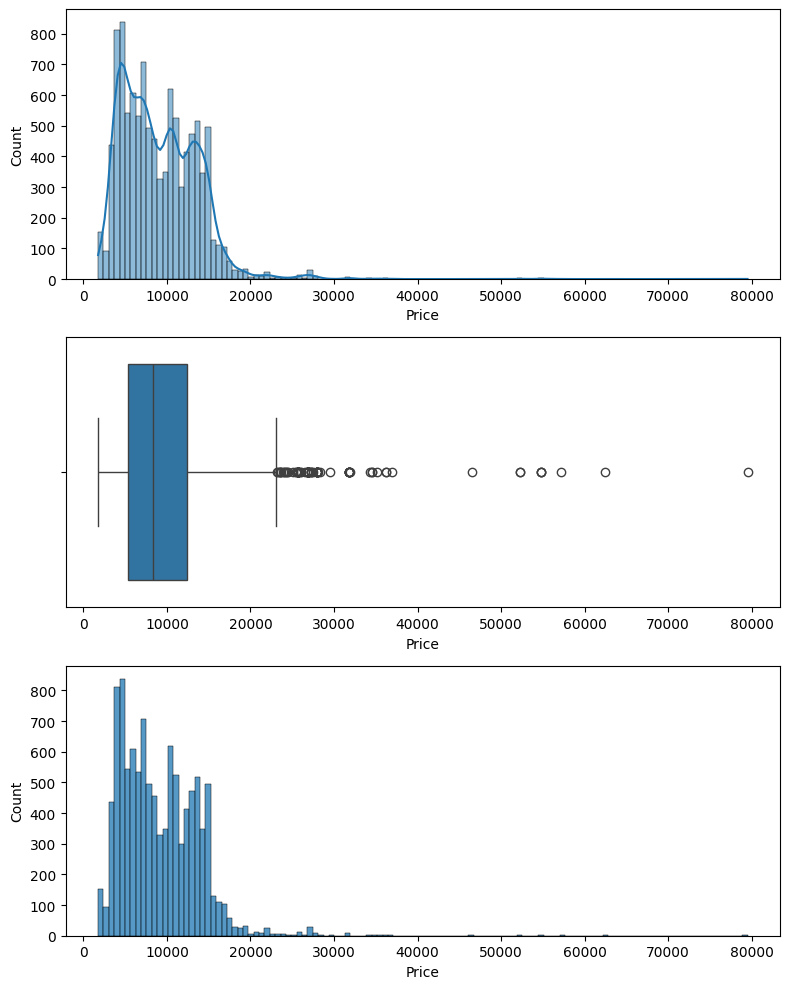

In [309]:
plot(data , 'Price')

        If Features Are Skewed We Use the below Technique which is IQR
        Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
        where ,  IQR = 75th%ile data - 25th%ile data
         
         & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR 
          


In [310]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [311]:
print(maximum)

23017.0


In [312]:
print(minimum)

-5367.0


In [313]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [314]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

### b.. How to deal with Outlier

In [315]:
### wherever I have price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

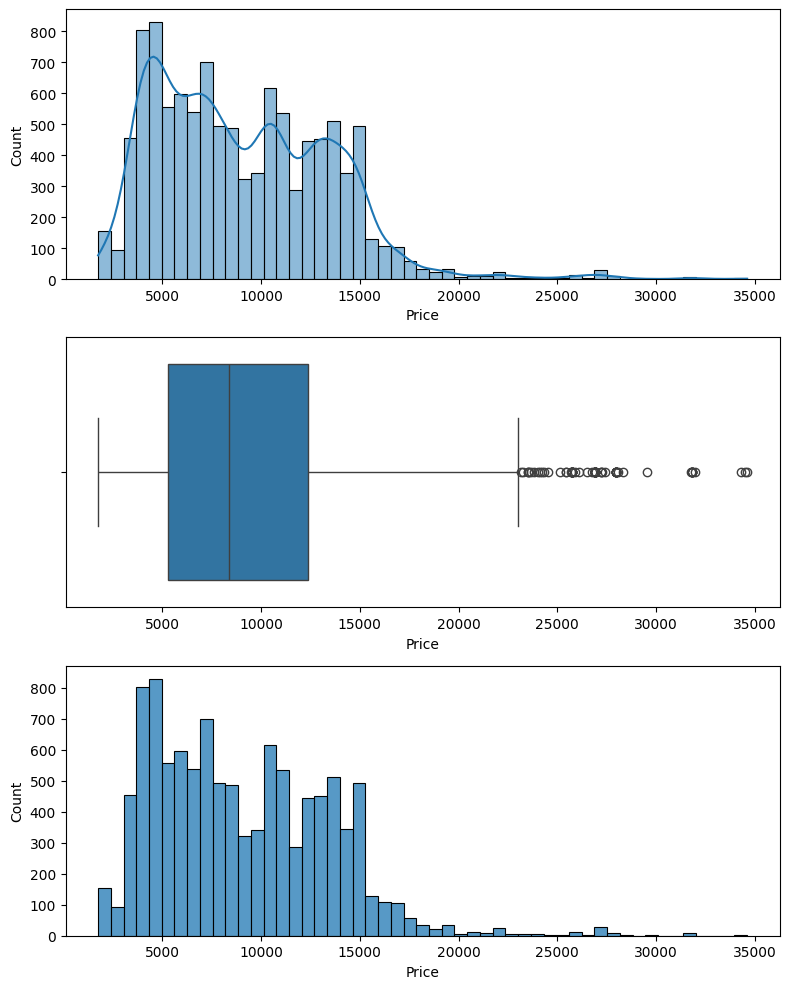

In [316]:
plot(data , 'Price')

## 13.. Lets Perform feature selection

In [317]:
'''
    : Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
    
    Q-> Why to apply Feature Selection?
    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features
    
'''

'\n    : Feature Selection\n    Finding out the best feature which will contribute and have good relation with target variable. \n    \n    \n    Q-> Why to apply Feature Selection?\n    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features\n    \n'

In [318]:
X = data.drop(['Price'] , axis=1)

In [319]:
y = data['Price']

In [320]:
from sklearn.feature_selection import mutual_info_regression

In [321]:
imp = mutual_info_regression(X , y)

In [322]:
'''
Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables. 
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.

'''


'\nEstimate mutual information for a continuous target variable.\n\nMutual information between two random variables is a non-negative\nvalue, which measures the dependency between the variables. \nIf It is equal to zero it means two random variables are independent, and higher\nvalues mean higher dependency.\n\n'

In [323]:
imp

array([1.32395262, 1.07657233, 0.7835788 , 0.38294664, 0.62226277,
       0.92137921, 0.75557127, 1.13859189, 0.89876543, 1.12257276,
       0.67028543, 0.96638721, 0.67623406, 0.38990606, 0.46703235,
       0.51356202, 0.14143796, 0.20095601])

In [324]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [325]:
imp_df.columns = ['importance']

In [326]:
imp_df

,importance
Airline,1.323953
Destination,1.076572
Total_Stops,0.783579
Journey_day,0.382947
Journey_month,0.622263
Dep_Time_hour,0.921379
Dep_Time_minute,0.755571
Arrival_Time_hour,1.138592
Arrival_Time_minute,0.898765
Duration_hours,1.122573


In [327]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Airline,1.323953
Arrival_Time_hour,1.138592
Duration_hours,1.122573
Destination,1.076572
Duration_hour,0.966387
Dep_Time_hour,0.921379
Arrival_Time_minute,0.898765
Total_Stops,0.783579
Dep_Time_minute,0.755571
Duration_minute,0.676234


## 14.. Lets Build ML model

#### split dataset into train & test

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

#### what we often do in modelling:

    a..Initially ,lets build basic random model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will try to improve it..
    d..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [330]:
from sklearn.ensemble import RandomForestRegressor

In [331]:
ml_model = RandomForestRegressor()

In [332]:
ml_model.fit(X_train , y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [333]:
y_pred = ml_model.predict(X_test)

In [334]:
y_pred

array([16882.14,  5344.35,  8865.98, ...,  3520.61,  6365.72,  6859.99],
      shape=(2671,))

In [335]:
from sklearn import metrics

In [336]:
metrics.r2_score(y_test , y_pred)

0.8100922914915814

### b.. Lets Save model

#### lets try to dump ml model using pickle or joblib..
    advantage of dumping--
    imagine in future we have new data & lets say we have to predict price on this huge data

    then to do prediction on this new data , we can use this pre-trained model what we have dumped..


In [337]:
# pickle is part of the Python standard library; no installation needed

In [338]:
import pickle

## 15.. How to automate ml pipeline & How to define your Evaluation metric..

### a.. how to make our own metric...

In [339]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [340]:
mape(y_test , y_pred)

np.float64(13.25860586487667)

### b.. How to automate ml pipeline !

In [341]:
'''

    Lets automate all the stuffs..
    let say ,I will just pass ml algo & i get several results like--
    
    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error


'''

'\n\n    Lets automate all the stuffs..\n    let say ,I will just pass ml algo & i get several results like--\n    \n    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error\n\n\n'

In [342]:
from sklearn import metrics

In [343]:
# Your existing predict function (from your notebook)
def predict(ml_model, X_train, y_train, X_test, y_test, model_name="Model"):
    """
    Your custom predict function with all metrics
    """
    from sklearn import metrics
    
    model = ml_model.fit(X_train, y_train)
    print(f'\n{"="*50}')
    print(f"Results for {model_name}")
    print(f'{"="*50}')
    print('Training score : {}'.format(model.score(X_train, y_train)))
    
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection[:5]))  # Show first 5 predictions
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predection))))
    
    # MAPE calculation (your existing mape function)
    def mape(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print('MAPE : {}'.format(mape(y_test, y_predection)))
    
    # Plot error distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(y_test - y_predection, kde=True)
    plt.title(f'Error Distribution - {model_name}')
    plt.xlabel('Prediction Error')
    plt.tight_layout()
    plt.show()
    
    return model, r2_score



In [344]:
# Cross-validation function to get robust scores
def cross_validate_model(model, X, y, cv=5):
    """
    Perform cross-validation and return scores
    """
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Calculate different metrics
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    neg_mse_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    neg_mae_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    
    # Convert negative MSE to positive RMSE
    rmse_scores = np.sqrt(-neg_mse_scores)
    mae_scores = -neg_mae_scores
    
    return {
        'R2': r2_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores
    }

In [345]:
# def predict(ml_model):
#     model = ml_model.fit(X_train , y_train)
#     print('Training score : {}'.format(model.score(X_train , y_train)))
#     y_predection = model.predict(X_test)
#     print('predictions are : {}'.format(y_predection))
#     print('\n')
#     r2_score = metrics.r2_score(y_test , y_predection)
#     print('r2 score : {}'.format(r2_score))
#     print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
#     print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
#     print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
#     print('MAPE : {}'.format(mape(y_test , y_predection)))
#     sns.histplot(y_test - y_predection, kde=True)
#     plt.show()


Results for Random Forest Regressor
Training score : 0.9514193674052405
predictions are : [16846.72        5321.02        8804.85        3800.26
 15056.10666667]


r2 score : 0.8104349468079858
MAE : 1180.87545500507
MSE : 3690376.5660981038
RMSE : 1921.0352849695666
MAPE : 13.266871420971357


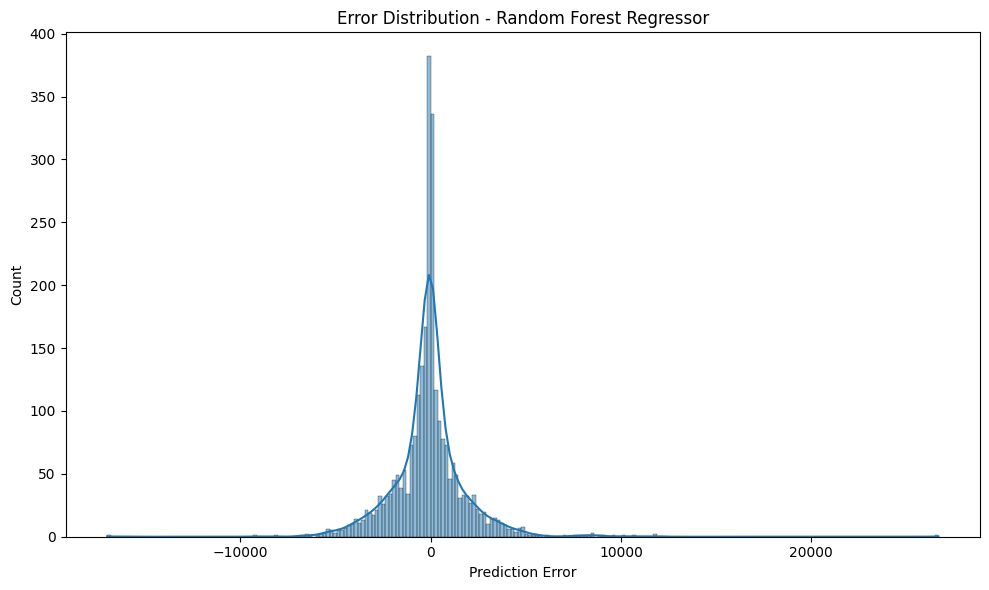

(RandomForestRegressor(), 0.8104349468079858)

In [346]:
predict(RandomForestRegressor(),X_train, y_train, X_test, y_test, model_name="Random Forest Regressor"  )

In [347]:
from sklearn.tree import DecisionTreeRegressor


Results for Decision Tree Regressor
Training score : 0.966591628243878
predictions are : [16840.  4959.  8085.  3858. 16079.]


r2 score : 0.6783481142189908
MAE : 1408.328903032572
MSE : 6261790.144015349
RMSE : 2502.3569177907752
MAPE : 15.521254030967482


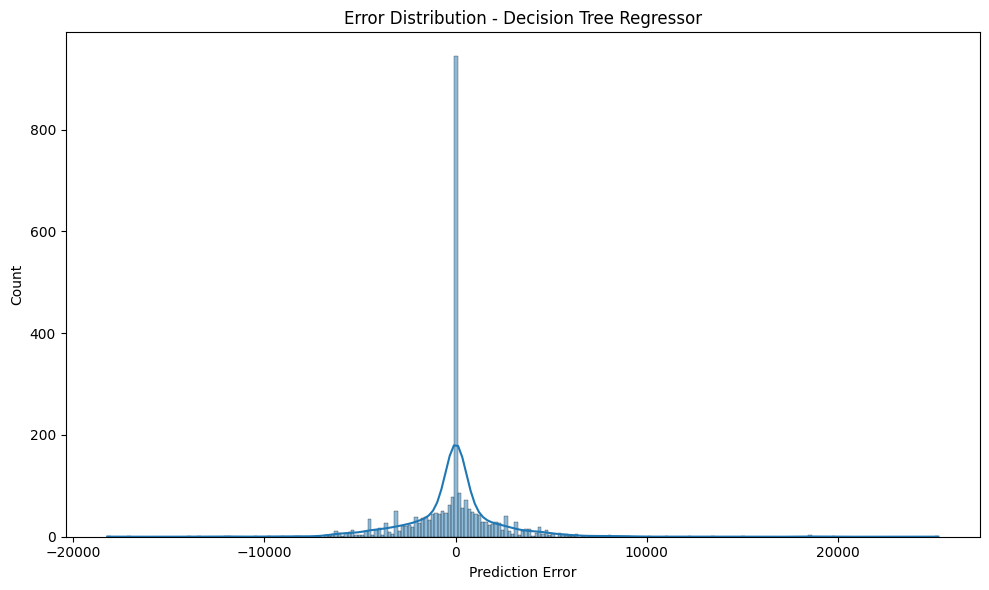

(DecisionTreeRegressor(), 0.6783481142189908)

In [348]:
predict(DecisionTreeRegressor(),X_train, y_train, X_test, y_test, model_name="Decision Tree Regressor")

## 16.. how to hypertune ml model

In [349]:
## how to select which ML algo we should apply for
## ans is use Multiple Algos,then go for Hyper-parameter Optimization,then for Cross Validation then go for various metrics 
## & based on domain expertise knowledge Then I can say ya this model perfoms best

### Hyperparameter Tuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slower way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.define searching &  apply searching on Training data or  Fit the CV model 
    4.Check best parameters and best score

In [350]:
from sklearn.model_selection import RandomizedSearchCV

In [351]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [352]:
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [353]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [354]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [355]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [356]:

## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [357]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=760; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=760; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=320; total time=   0.0s
[CV] END max_depth=21, max_features=auto, min_samples_split=5, n_estimators=320; total time=   0.0s
[CV] END max_depth=21, max_features=auto, min_samples_split=5, n_estimators=320; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_split=100, n_estimators=1200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=760; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=320; total time=   0.0s
[CV] END max_depth=21, max_features=auto, min_samples_split=5, n_estimators=320; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=320; total time=   0.

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [5, 13, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [5, 10, ...], 'n_estimators': [100, 320, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [358]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [359]:
#### In your case , may be your parameters may vary a little bit , thats not a major issue..

In [360]:
rf_random.best_estimator_

,n_estimators,100
,criterion,'squared_error'
,max_depth,13
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [361]:
rf_random.best_score_

np.float64(0.794167080593435)

In [362]:
import optuna

import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# For visualization


In [363]:
# Random Forest Objective
def rf_objective(trial, X_train, y_train, cv=5):
    """
    Optuna objective function for Random Forest
    """
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = RandomForestRegressor(**params)
    
    # Perform cross-validation
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kfold, 
                             scoring='neg_mean_squared_error', n_jobs=-1)
    
    return -np.mean(scores)  # Return negative MSE for minimization





In [364]:
# XGBoost Objective
def xgboost_objective(trial, X_train, y_train, cv=5):
    """
    Optuna objective function for XGBoost
    """
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = xgb.XGBRegressor(**params)
    
    # Perform cross-validation
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kfold, 
                             scoring='neg_mean_squared_error', n_jobs=-1)
    
    return -np.mean(scores)

#  Run Optuna Optimization

In [368]:
# Assuming you already have X_train, y_train, X_test, y_test from your notebook
print("Data shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Number of trials
N_TRIALS = 30  # You can increase this for better results
CV_FOLDS = 5

# Dictionary to store best models and their parameters
best_models = {}
best_params = {}
best_scores = {}
cv_results = {}

# 1. Optimize Random Forest
print("\n" + "="*60)
print("OPTIMIZING RANDOM FOREST WITH OPTUNA")
print("="*60)

rf_study = optuna.create_study(direction='minimize', study_name='Random Forest')
rf_study.optimize(lambda trial: rf_objective(trial, X_train, y_train, cv=CV_FOLDS), 
                  n_trials=N_TRIALS, show_progress_bar=True)

best_models['Random Forest'] = RandomForestRegressor(**rf_study.best_params, random_state=42, n_jobs=-1)
best_params['Random Forest'] = rf_study.best_params
best_scores['Random Forest'] = rf_study.best_value

print(f"\nBest CV RMSE: {np.sqrt(rf_study.best_value):.4f}")
print(f"Best params: {rf_study.best_params}")

# 2. Optimize XGBoost
print("\n" + "="*60)
print("OPTIMIZING XGBOOST WITH OPTUNA")
print("="*60)

xgb_study = optuna.create_study(direction='minimize', study_name='XGBoost')
xgb_study.optimize(lambda trial: xgboost_objective(trial, X_train, y_train, cv=CV_FOLDS), 
                   n_trials=N_TRIALS, show_progress_bar=True)

best_models['XGBoost'] = xgb.XGBRegressor(**xgb_study.best_params, random_state=42, n_jobs=-1)
best_params['XGBoost'] = xgb_study.best_params
best_scores['XGBoost'] = xgb_study.best_value

print(f"\nBest CV RMSE: {np.sqrt(xgb_study.best_value):.4f}")
print(f"Best params: {xgb_study.best_params}")



[I 2026-02-16 17:51:06,252] A new study created in memory with name: Random Forest


Data shapes:
X_train: (8011, 18)
X_test: (2671, 18)
y_train: (8011,)
y_test: (2671,)

OPTIMIZING RANDOM FOREST WITH OPTUNA


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2026-02-16 17:51:08,571] Trial 0 finished with value: 3333237.6088912315 and parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 3333237.6088912315.
[I 2026-02-16 17:51:10,970] Trial 1 finished with value: 4327834.244624107 and parameters: {'n_estimators': 750, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 3333237.6088912315.
[I 2026-02-16 17:51:13,317] Trial 2 finished with value: 4516355.608649816 and parameters: {'n_estimators': 650, 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 3333237.6088912315.
[I 2026-02-16 17:51:14,726] Trial 3 finished with value: 4171969.65832978 and parameters: {'n_estimators': 350, 'max_depth': 30, 'min_samples_split': 14, 'min_samples_leaf': 10, 'max_features

[I 2026-02-16 17:52:11,928] A new study created in memory with name: XGBoost


[I 2026-02-16 17:52:11,923] Trial 29 finished with value: 4868298.170926675 and parameters: {'n_estimators': 300, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 25 with value: 3249680.6537939697.

Best CV RMSE: 1802.6871
Best params: {'n_estimators': 800, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}

OPTIMIZING XGBOOST WITH OPTUNA


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2026-02-16 17:52:13,898] Trial 0 finished with value: 3947679.766908015 and parameters: {'n_estimators': 350, 'max_depth': 9, 'learning_rate': 0.1462049423885087, 'subsample': 0.9551613487822209, 'colsample_bytree': 0.7505012820653337, 'min_child_weight': 8, 'gamma': 0.6227522341997649, 'reg_alpha': 1.6900636424531176e-05, 'reg_lambda': 6.151241927422136e-08}. Best is trial 0 with value: 3947679.766908015.
[I 2026-02-16 17:52:17,297] Trial 1 finished with value: 3766688.1265241676 and parameters: {'n_estimators': 900, 'max_depth': 11, 'learning_rate': 0.024030986438413827, 'subsample': 0.9182604468242329, 'colsample_bytree': 0.6590114766638976, 'min_child_weight': 6, 'gamma': 2.5716968726610228, 'reg_alpha': 7.308866071445958e-06, 'reg_lambda': 7.162000894862982e-05}. Best is trial 1 with value: 3766688.1265241676.
[I 2026-02-16 17:52:19,406] Trial 2 finished with value: 3125967.505092688 and parameters: {'n_estimators': 350, 'max_depth': 6, 'learning_rate': 0.06237978732659162, 'su

# Evaluate All Models Using Your predict() Function


############################################################
EVALUATING RANDOM FOREST
############################################################

Results for Random Forest
Training score : 0.9212425819699545
predictions are : [16750.12527753  5254.17693556  8726.60870109  3701.34509333
 14733.18847499]


r2 score : 0.8296663982176102
MAE : 1136.9773205755591
MSE : 3315986.369070361
RMSE : 1820.984999682963
MAPE : 12.738341699351663


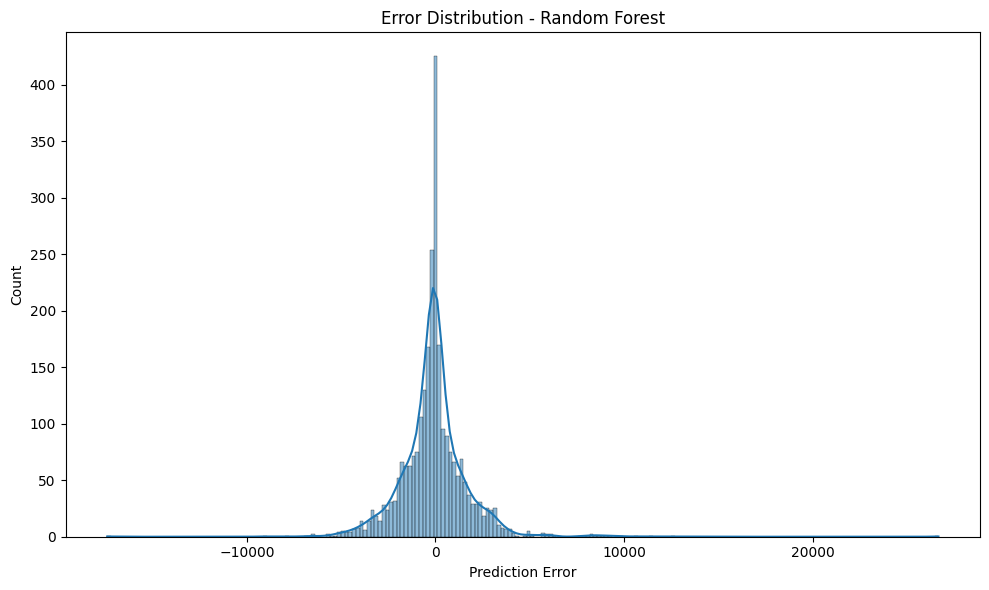


############################################################
EVALUATING XGBOOST
############################################################

Results for XGBoost
Training score : 0.9206260791967167
predictions are : [17326.883   6276.0576  8081.4326  3951.9866 14277.457 ]


r2 score : 0.8345909715540918
MAE : 1156.8935240670921
MSE : 3220116.746832689
RMSE : 1794.4683744309034
MAPE : 13.07840082541476


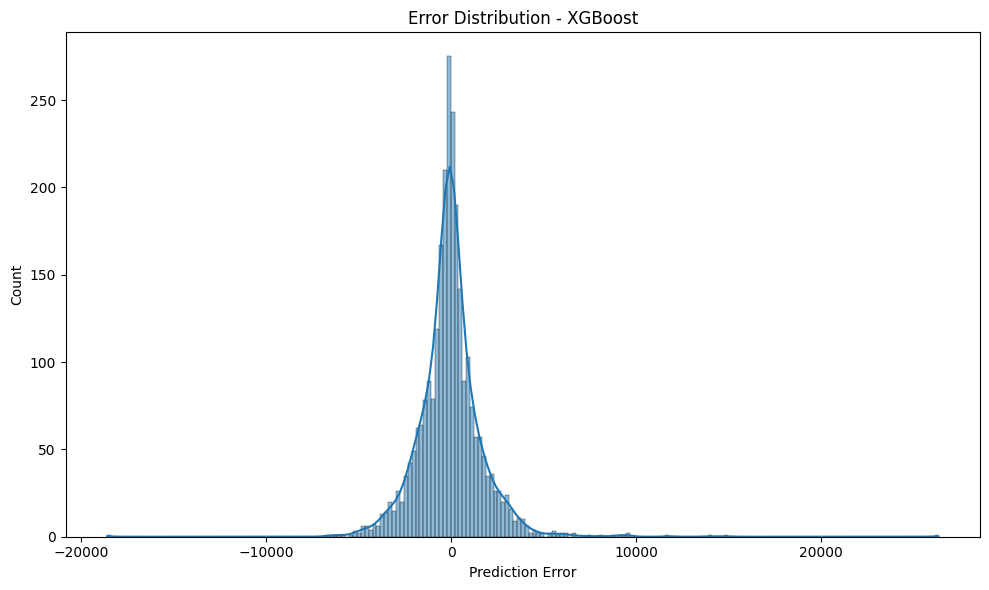


############################################################
EVALUATING DEFAULT RANDOM FOREST (FOR COMPARISON)
############################################################

Results for Default Random Forest
Training score : 0.9516460014371839
predictions are : [16943.88        5263.04        8862.39        3780.45
 14877.26316667]


r2 score : 0.8079355362482428
MAE : 1183.6464523962145
MSE : 3739034.090274728
RMSE : 1933.6582144408892
MAPE : 13.240812023207882


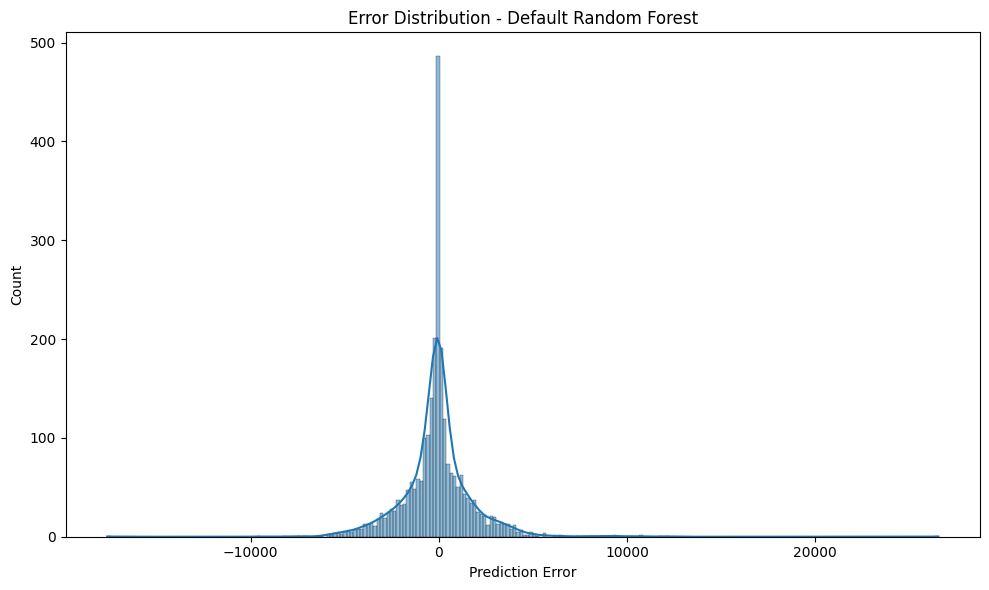

In [369]:
# Dictionary to store results from your predict function
predict_results = {}

# Evaluate each optimized model using your custom predict function
for name, model in best_models.items():
    print(f"\n{'#'*60}")
    print(f"EVALUATING {name.upper()}")
    print(f"{'#'*60}")
    
    trained_model, r2 = predict(model, X_train, y_train, X_test, y_test, name)
    predict_results[name] = {
        'model': trained_model,
        'r2_score': r2
    }

# Also evaluate the default RandomForest from your notebook for comparison
print(f"\n{'#'*60}")
print("EVALUATING DEFAULT RANDOM FOREST (FOR COMPARISON)")
print(f"{'#'*60}")
default_rf = RandomForestRegressor(random_state=42, n_jobs=-1)
_, default_r2 = predict(default_rf, X_train, y_train, X_test, y_test, "Default Random Forest")

# Create Comparison Summary

In [370]:
# Create comparison DataFrame
comparison_data = []
for name, result in predict_results.items():
    comparison_data.append({
        'Model': name,
        'Test R2 Score': result['r2_score'],
        'CV RMSE': np.sqrt(best_scores[name])
    })

# Add default Random Forest for comparison
comparison_data.append({
    'Model': 'Default Random Forest',
    'Test R2 Score': default_r2,
    'CV RMSE': None
})

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test R2 Score', ascending=False)

print("\n" + "="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)
print(comparison_df.to_string(index=False))

# Identify the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = predict_results[best_model_name]['model'] if best_model_name in predict_results else default_rf

print(f"\n{'#'*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'#'*60}")
print(f"Test R2 Score: {comparison_df.iloc[0]['Test R2 Score']:.4f}")


MODEL PERFORMANCE COMPARISON
                Model  Test R2 Score     CV RMSE
              XGBoost       0.834591 1768.040584
        Random Forest       0.829666 1802.687065
Default Random Forest       0.807936         NaN

############################################################
BEST MODEL: XGBoost
############################################################
Test R2 Score: 0.8346


# Feature Importance Analysis for Best Model

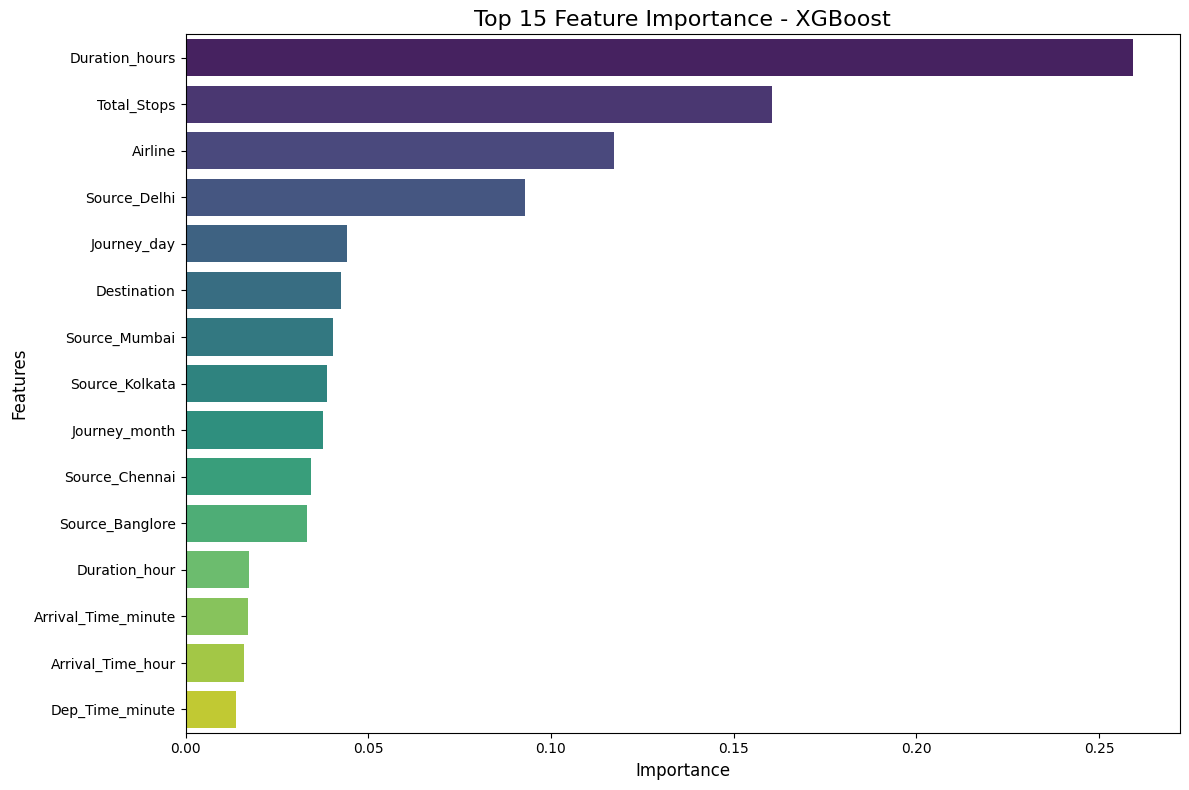


TOP 10 MOST IMPORTANT FEATURES
       feature  importance
Duration_hours    0.259186
   Total_Stops    0.160536
       Airline    0.117353
  Source_Delhi    0.092882
   Journey_day    0.044070
   Destination    0.042542
 Source_Mumbai    0.040454
Source_Kolkata    0.038772
 Journey_month    0.037640
Source_Chennai    0.034447


In [371]:
# Get feature importance based on model type
if best_model_name == 'Random Forest':
    importance = best_model.feature_importances_
    importance_name = 'Random Forest Feature Importance'
elif best_model_name == 'XGBoost':
    importance = best_model.feature_importances_
    importance_name = 'XGBoost Feature Importance'
else:
    importance = best_model.feature_importances_
    importance_name = 'Feature Importance'

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importance
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature', palette='viridis')
plt.title(f'Top 15 Feature Importance - {best_model_name}', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*60)
print(feature_importance.head(10).to_string(index=False))

# Save Best Model and Results

In [372]:
import pickle
import joblib
from datetime import datetime

# Create timestamp for filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model
best_model_filename = f'best_flight_price_model_{best_model_name.replace(" ", "_")}_{timestamp}.pkl'
with open(best_model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Also save using joblib (often better for large models)
joblib.dump(best_model, f'best_flight_price_model_{best_model_name.replace(" ", "_")}_{timestamp}.joblib')

print(f"\n{'#'*60}")
print("MODEL SAVED SUCCESSFULLY")
print(f"{'#'*60}")
print(f"Best model saved as: {best_model_filename}")
print(f"Also saved as joblib file: best_flight_price_model_{best_model_name.replace(' ', '_')}_{timestamp}.joblib")

# Save the comparison results
comparison_df.to_csv(f'model_comparison_results_{timestamp}.csv', index=False)
print(f"Results saved to model_comparison_results_{timestamp}.csv")

# Save best parameters
with open(f'best_params_{timestamp}.txt', 'w') as f:
    f.write(f"Best Model: {best_model_name}\n")
    f.write(f"Test R2 Score: {comparison_df.iloc[0]['Test R2 Score']:.4f}\n")
    f.write("\nBest Parameters:\n")
    for param, value in best_params[best_model_name].items():
        f.write(f"  {param}: {value}\n")
print(f"Parameters saved to best_params_{timestamp}.txt")


############################################################
MODEL SAVED SUCCESSFULLY
############################################################
Best model saved as: best_flight_price_model_XGBoost_20260216_182739.pkl
Also saved as joblib file: best_flight_price_model_XGBoost_20260216_182739.joblib
Results saved to model_comparison_results_20260216_182739.csv
Parameters saved to best_params_20260216_182739.txt


# Load and Test Saved Model

In [373]:
# Test loading the saved model
def load_and_test_model(model_path, X_test, y_test, is_joblib=False):
    """
    Load a saved model and test it
    """
    if is_joblib:
        loaded_model = joblib.load(model_path)
    else:
        with open(model_path, 'rb') as f:
            loaded_model = pickle.load(f)
    
    # Make predictions
    y_pred = loaded_model.predict(X_test)
    
    # Calculate metrics
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"\n{'#'*60}")
    print("LOADED MODEL TEST RESULTS")
    print(f"{'#'*60}")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    
    return loaded_model

# Test loading the pickle file
loaded_model = load_and_test_model(best_model_filename, X_test, y_test)


############################################################
LOADED MODEL TEST RESULTS
############################################################
R2 Score: 0.8346
MAE: 1156.8935
RMSE: 1794.4684
